# Car Accident Prediction
### Theophilus O. I

In [196]:
import pandas as pd
import numpy as np

print("Hello Capstone Project Course!")

Hello Capstone Project Course!


In [296]:
dpath = "https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv"
df = pd.read_csv(dpath)
df.head(5)

C:\Users\rosh7\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [297]:
df_orig = df
missing_data = df.isnull()
missing_data.head(5)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,...,False,False,True,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,...,False,False,True,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,...,False,False,True,True,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False


In [328]:
df = df_orig
# drop all rows where X,Y, WEATHER, ROADCOND, LIGHTCOND are empty
df.dropna(subset=["X"], axis=0, inplace=True)
df.dropna(subset=["Y"], axis=0, inplace=True)
df.dropna(subset=["ROADCOND"], axis=0, inplace=True)
df.dropna(subset=["LIGHTCOND"], axis=0, inplace=True)
df.dropna(subset=["WEATHER"], axis=0, inplace=True)

In [329]:
# reset index
df.reset_index(drop=True, inplace=True)

In [330]:
#Replace all NaN by 0s and Ys by 1s
df["INATTENTIONIND"].replace(np.nan, 0, inplace=True)
df["INATTENTIONIND"].replace('Y', 1, inplace=True)

In [331]:
#Replace all Ns by 0s and Ys by 1s
df["UNDERINFL"].replace('1', 1, inplace=True)
df["UNDERINFL"].replace('0', 0, inplace=True)
df["UNDERINFL"].replace('Y', 1, inplace=True)
df["UNDERINFL"].replace('N', 0, inplace=True)

In [332]:
df["SPEEDING"].value_counts()

Y    8707
Name: SPEEDING, dtype: int64

In [333]:
# Drop all rows with either ROADCOND, LIGHTCOND or WEATHER as "Unknown"
df = df[df["ROADCOND"]!= "Unknown" ]
df = df[df["LIGHTCOND"]!= "Unknown" ]
df = df[df["WEATHER"]!= "Unknown" ]


# reset index
df.reset_index(drop=True, inplace=True)

In [337]:
# reset index
df.reset_index(drop=True, inplace=True)
len(df)


166705

In [335]:
df = df.drop(columns=['OBJECTID','INCKEY','COLDETKEY','REPORTNO','STATUS', 'INTKEY','LOCATION','EXCEPTRSNCODE','EXCEPTRSNDESC', 'SEVERITYCODE','SEVERITYDESC',\
                'PEDCOUNT','PEDCYLCOUNT', 'INCDATE', 'SDOT_COLCODE', 'SDOT_COLDESC', 'PEDROWNOTGRNT','SDOTCOLNUM', 'ST_COLCODE', 'ST_COLDESC',\
                'SEGLANEKEY', 'CROSSWALKKEY'])

In [336]:
df['INCDTTM'] = pd.to_datetime(df['INCDTTM'])
df['TIME']= df['INCDTTM'].apply(lambda x:x.time().hour)
df['TIME'] = [13 if t == 0 else t for t in df['TIME']]

df['RUSH'] = df['TIME'][(df['TIME'] > 11) & (df['TIME'] < 18)]
df['RUSH'] = df['RUSH'].notnull()

In [338]:
df.corr()

,X,Y,SEVERITYCODE.1,PERSONCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,TIME,RUSH
X,1.000000,-0.158158,0.007014,0.011807,-0.015704,-0.019807,-0.034692,0.004349,0.007449
Y,-0.158158,1.000000,0.026734,-0.011401,0.020316,0.012758,-0.004913,0.036962,0.032300
SEVERITYCODE.1,0.007014,0.026734,1.000000,0.112341,-0.082431,0.028650,0.031764,0.019873,0.010450
PERSONCOUNT,0.011807,-0.011401,0.112341,1.000000,0.397020,0.064352,0.015166,0.051365,0.034391
VEHCOUNT,-0.015704,0.020316,-0.082431,0.397020,1.000000,0.050103,-0.007125,0.021515,0.035000
INATTENTIONIND,-0.019807,0.012758,0.028650,0.064352,0.050103,1.000000,-0.035479,-0.019117,-0.004156
UNDERINFL,-0.034692,-0.004913,0.031764,0.015166,-0.007125,-0.035479,1.000000,-0.010653,-0.091425
TIME,0.004349,0.036962,0.019873,0.051365,0.021515,-0.019117,-0.010653,1.000000,0.146868
RUSH,0.007449,0.032300,0.010450,0.034391,0.035000,-0.004156,-0.091425,0.146868,1.000000


In [339]:
df[['WEATHER','SEVERITYCODE.1']].groupby('SEVERITYCODE.1').head()



,WEATHER,SEVERITYCODE.1
0,Overcast,2
1,Raining,1
2,Overcast,1
3,Clear,1
4,Raining,2
5,Clear,1
6,Raining,1
7,Clear,2
9,Clear,2
13,Clear,2


In [316]:
%%capture
! pip install seaborn

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

Text(0.5, 1.0, 'Severity vs Weather')

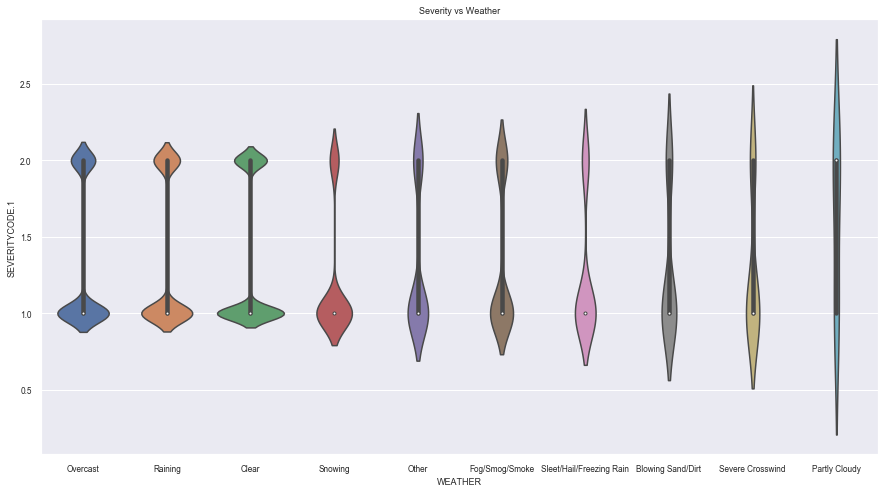

In [340]:
fig = plt.gcf()
fig.set_size_inches(15, 8)
sns.set(font_scale=0.75)

sns.violinplot(x="WEATHER", y="SEVERITYCODE.1",  data=df).set_title("Severity vs Weather")


Text(0.5, 1.0, 'Severity vs Weather')

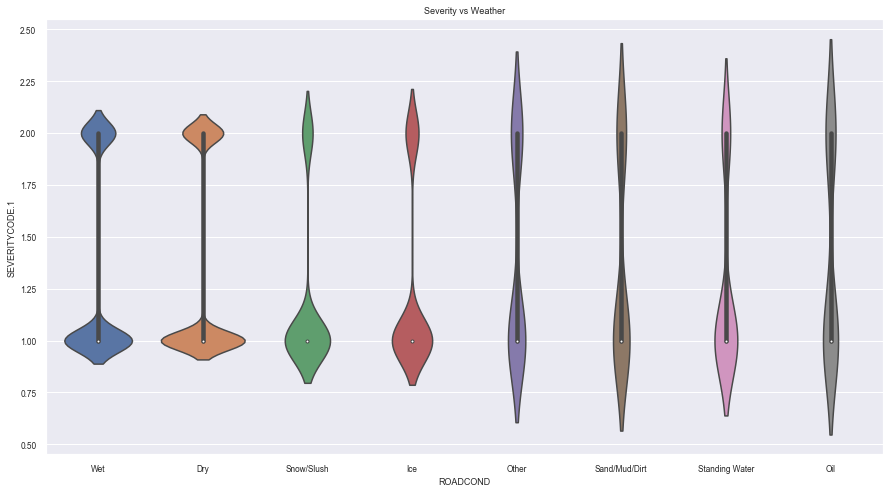

In [88]:
fig = plt.gcf()
fig.set_size_inches(15, 8)
sns.set(font_scale=0.75)

sns.violinplot(x="ROADCOND", y="SEVERITYCODE.1",  data=df).set_title("Severity vs Weather")

In [341]:

grouped_test1 = df.groupby(['ROADCOND','SEVERITYCODE.1'],as_index=False).count()

grouped_test1 = grouped_test1[['ROADCOND','SEVERITYCODE.1','X']]

grouped_test1.set_index("ROADCOND")

grouped_pivot = grouped_test1.pivot(index='SEVERITYCODE.1',columns='ROADCOND')
grouped_pivot


X                                                         \
ROADCOND          Dry  Ice Oil Other Sand/Mud/Dirt Snow/Slush Standing Water   
SEVERITYCODE.1                                                                 
1               80280  810  30    59            36        677             69   
2               39126  261  20    39            21        156             26   

                       
ROADCOND          Wet  
SEVERITYCODE.1         
1               29883  
2               15212

Text(0.5, 1.0, 'Road Condition vs Severity')

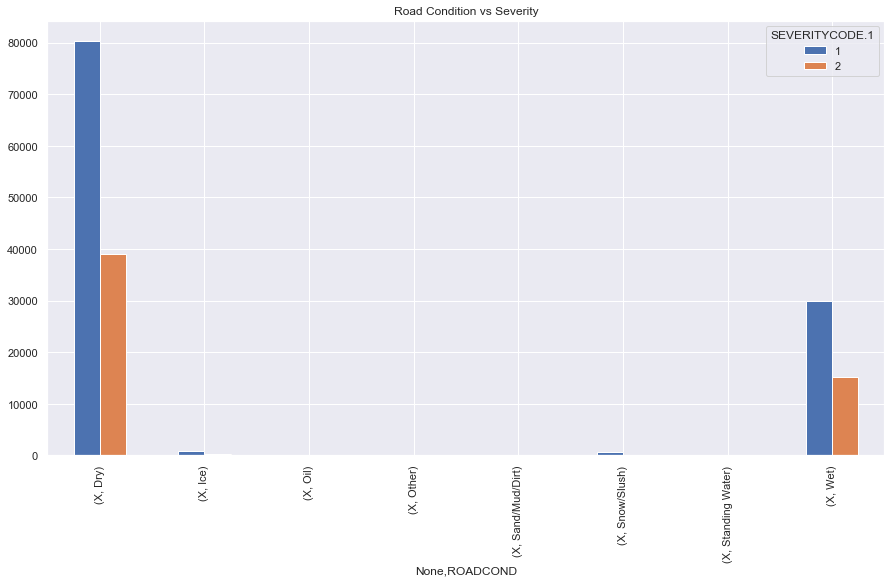

In [320]:

sns.set(font_scale=1)
grouped_pivot.T.plot(kind="bar",figsize=(15,8)).set_title("Road Condition vs Severity")

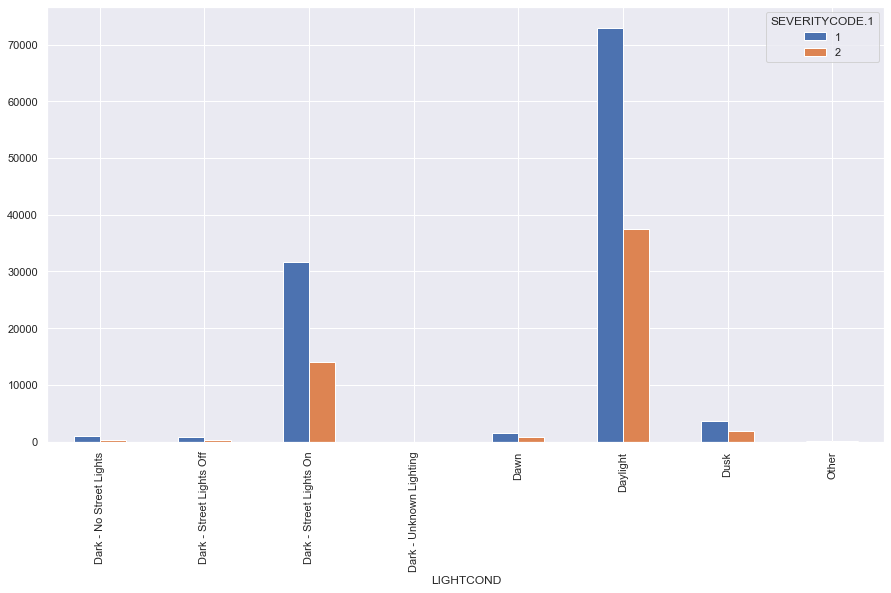

In [157]:
df.groupby(['LIGHTCOND','SEVERITYCODE.1'])["X"].count().unstack().plot(kind="bar",figsize=(15,8))


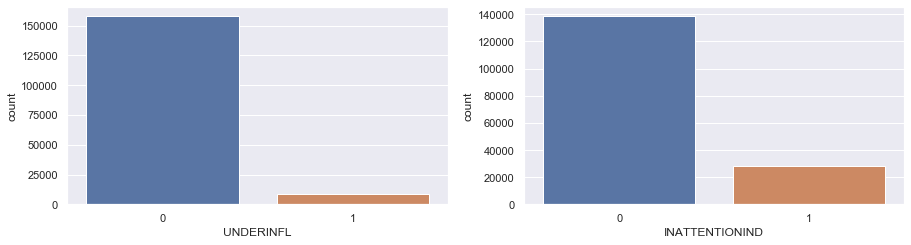

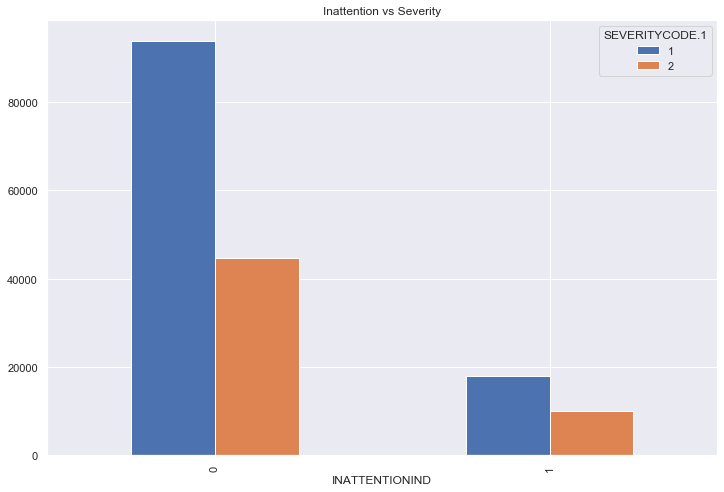

In [321]:
fig = plt.figure(figsize = (15,8))


ax1 = fig.add_subplot(2,2,1)
sns.countplot(data = df, x = 'UNDERINFL', ax=ax1)

ax2 = fig.add_subplot(2,2,2)
sns.countplot(data = df, x = 'INATTENTIONIND', ax=ax2)

groupdf = df.groupby(['INATTENTIONIND','SEVERITYCODE.1'])["X"].count().unstack().plot(kind="bar",figsize=(12,8)).set_title("Inattention vs Severity")

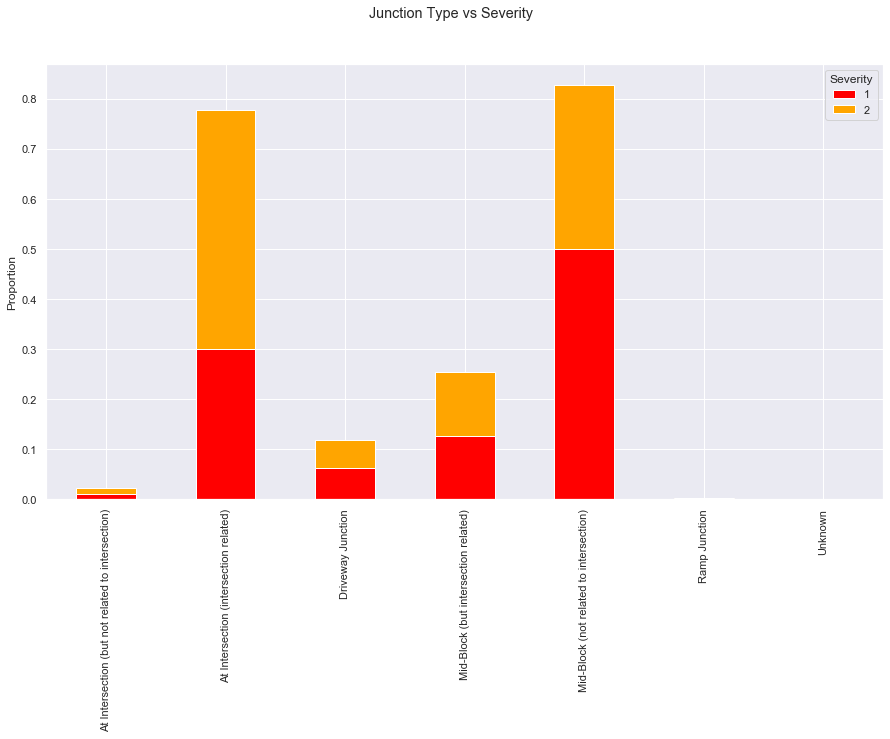

In [322]:
from matplotlib.patches import Patch

counts_df = df.groupby(["JUNCTIONTYPE", "SEVERITYCODE.1"])["X"].count().unstack()

grp_df = counts_df.div(counts_df.sum()).T
fig, ax = plt.subplots(figsize = (15,8))

grp_df.T.plot(kind="bar", stacked=True, color=["red", "orange"], ax=ax)

ax.legend(title="Severity")

ax.set_xlabel("")
ax.set_ylabel("Proportion")

fig.suptitle("Junction Type vs Severity");

#sns.plot(x="JUNCTIONTYPE", y="SEVERITYCODE.1",  data=df).set_title("Severity vs Junction Type")

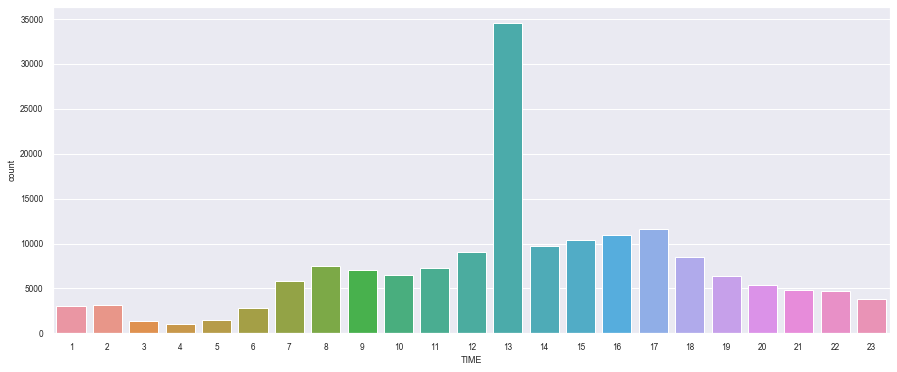

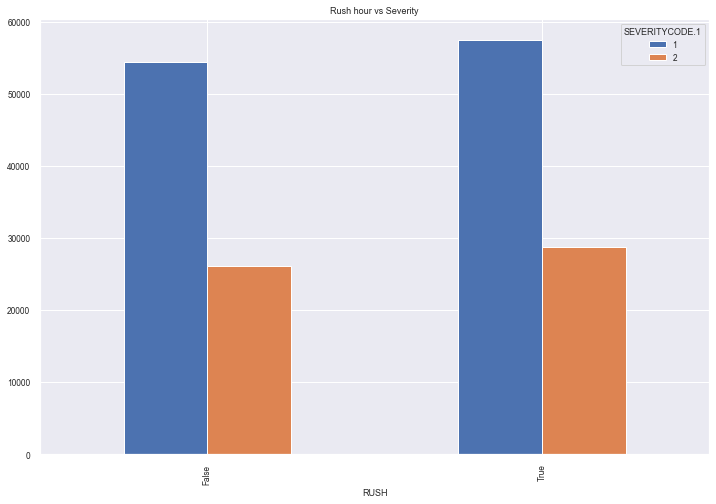

In [342]:
fig = plt.figure(figsize = (15,6))

sns.countplot(data = df, x = 'TIME')

groupdf = df.groupby(['RUSH','SEVERITYCODE.1'])["X"].count().unstack().plot(kind="bar",figsize=(12,8)).set_title("Rush hour vs Severity")

In [345]:
len(df)

165208

In [344]:
#Drop columns that were deemed insignificant during Exploratory data analysis
df = df.drop(columns=['X','Y','COLLISIONTYPE','PERSONCOUNT','VEHCOUNT','HITPARKEDCAR'])

#Replace all NaN by 0s and Ys by 1s
df["SPEEDING"].replace(np.nan, 0, inplace=True)
df["SPEEDING"].replace('Y', 1, inplace=True)

df.dropna(subset=["JUNCTIONTYPE"], axis=0, inplace=True)
df.dropna(subset=["ADDRTYPE"], axis=0, inplace=True)
df.dropna(subset=["INATTENTIONIND"], axis=0, inplace=True)
df.dropna(subset=["SPEEDING"], axis=0, inplace=True)
# reset index
df.reset_index(drop=True, inplace=True)
df.dtypes

# Encode categorical variables using one hot encoding methodology
df_copy = df[['JUNCTIONTYPE','UNDERINFL','WEATHER','ROADCOND','LIGHTCOND','ADDRTYPE','INATTENTIONIND','SPEEDING','RUSH']]
categorical_cols = ['JUNCTIONTYPE','UNDERINFL','WEATHER','ROADCOND','LIGHTCOND','ADDRTYPE','INATTENTIONIND','SPEEDING','RUSH']
df_copy = pd.get_dummies(df_copy,columns=categorical_cols, prefix=categorical_cols, drop_first=True)
df_copy



,JUNCTIONTYPE_At Intersection (intersection related),JUNCTIONTYPE_Driveway Junction,JUNCTIONTYPE_Mid-Block (but intersection related),JUNCTIONTYPE_Mid-Block (not related to intersection),JUNCTIONTYPE_Ramp Junction,JUNCTIONTYPE_Unknown,UNDERINFL_1,WEATHER_Clear,WEATHER_Fog/Smog/Smoke,WEATHER_Other,...,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dark - Unknown Lighting,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk,LIGHTCOND_Other,ADDRTYPE_Intersection,INATTENTIONIND_1,SPEEDING_1,RUSH_True
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165203,0,0,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
165204,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
165205,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
165206,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,1


In [346]:
# Feature definition
X = df_copy
y = df["SEVERITYCODE.1"]
X.head()

,JUNCTIONTYPE_At Intersection (intersection related),JUNCTIONTYPE_Driveway Junction,JUNCTIONTYPE_Mid-Block (but intersection related),JUNCTIONTYPE_Mid-Block (not related to intersection),JUNCTIONTYPE_Ramp Junction,JUNCTIONTYPE_Unknown,UNDERINFL_1,WEATHER_Clear,WEATHER_Fog/Smog/Smoke,WEATHER_Other,...,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dark - Unknown Lighting,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk,LIGHTCOND_Other,ADDRTYPE_Intersection,INATTENTIONIND_1,SPEEDING_1,RUSH_True
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [347]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

#X= preprocessing.StandardScaler().fit(X).transform(X)
#X[0:5]

#define train test set from the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (132166, 34) (132166,)
Test set: (33042, 34) (33042,)


In [361]:
#KNN model
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.5936384 , 0.65643726, 0.59381999, 0.63873252, 0.60268749,
       0.63634163, 0.62523455, 0.63612977, 0.62656619])

In [362]:
# Based on the approve accuracy scores, we will go with k=2
neigh = KNeighborsClassifier(n_neighbors = 2).fit(X_train,y_train)
yhat=neigh.predict(X_test)
mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)



In [363]:
from sklearn.metrics import f1_score
f1k = f1_score(y_test, yhat, average='weighted') 
print(f1k)

from sklearn.metrics import jaccard_score
jk = jaccard_score(y_test, yhat)

print(jk)

0.571107970754359
0.6463881880198112


In [364]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.6620386483664482
Test set Accuracy:  0.6564372616669694


In [366]:
# Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
for n in range(1,50):

    dTree = DecisionTreeClassifier(criterion="entropy", max_depth = n)
    dTree # it shows the default parameters

    dTree.fit(X_train,y_train)
    yhat = dTree.predict(X_test)
    yhat[0:5]
    print(metrics.accuracy_score(y_test, yhat))

0.6671508988560014
0.6674838084861692
0.6674838084861692
0.6673022214151686
0.6671508988560014
0.6674232794625022
0.6671508988560014
0.6672719569033352
0.6669390472731674
0.6669390472731674
0.6669390472731674
0.6671811633678348
0.6668785182495006
0.6672114278796683
0.6666061376429998
0.6664548150838328
0.6664245505719992
0.666545608619333
0.6661824344773318
0.6662732280128322
0.6661521699654984
0.6663942860601658
0.6663942860601658
0.6663942860601658
0.6663640215483324
0.6664245505719992
0.6663640215483324
0.666333757036499
0.666333757036499
0.6663640215483324
0.6663034925246656
0.6663640215483324
0.666333757036499
0.6662429635009988
0.6663942860601658
0.6663034925246656
0.6663942860601658
0.6663640215483324
0.6662732280128322
0.6663640215483324
0.6663942860601658
0.6663942860601658
0.6663942860601658
0.6664548150838328
0.6663034925246656
0.666333757036499
0.6663034925246656
0.6663640215483324
0.6663942860601658


In [367]:
# We will go with a tree depth of 2
dTree = DecisionTreeClassifier(criterion="entropy", max_depth = 2)
dTree # it shows the default parameters

dTree.fit(X_train,y_train)
yhat = dTree.predict(X_test)
yhat[0:5]
print(metrics.accuracy_score(y_test, yhat))

0.6674838084861692


In [368]:
from sklearn.metrics import f1_score
f1d = f1_score(y_test, yhat, average='weighted') 
print(f1d)

from sklearn.metrics import jaccard_score
jd = jaccard_score(y_test, yhat)

print(jd)

0.5446777675154367
0.6654894200030446


In [373]:
# SVM model

from sklearn import svm
dsvm = svm.SVC(kernel='poly')
dsvm.fit(X_train, y_train)

yhat = dsvm.predict(X_test)
yhat[0:5]
print(metrics.accuracy_score(y_test, yhat))

from sklearn.metrics import f1_score
f1s = f1_score(y_test, yhat, average='weighted') 
print(f1s)
from sklearn.metrics import jaccard_score
js = jaccard_score(y_test, yhat)
print(js)

0.6665758731311664
0.5448232998898884
0.6644534462278805


In [375]:
# Logistic Regression Model

from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver='lbfgs').fit(X_train,y_train)
LR
yhat = LR.predict(X_test)
yhat

print(metrics.accuracy_score(y_test, yhat))

from sklearn.metrics import f1_score
f1l = f1_score(y_test, yhat, average='weighted')
print(f1l) 

from sklearn.metrics import jaccard_score
jl = jaccard_score(y_test, yhat)
print(jl)

yhat_prob = LR.predict_proba(X_test)


from sklearn.metrics import log_loss
ll = log_loss(y_test, yhat_prob)
print(ll)

0.6654863507051632
0.5674976554022274
0.6581405418780156
0.6159075478347518
